## EDA & Data Transformation 

This notebook continues the EDA of the GSAF dataset. The outline is as follows:

1. <a href='#1.-EDA'>EDA</a>: continue the data preparation steps
2. <a href='#2.-Data-Transformation'>Data Transformation</a>: perfrom sorting, subsetting, grouping and aggregating.


### 1. EDA
Question: **Which country has the most Shark attacks?**
Data Source: [Global Shark Attack File](https://www.sharkattackfile.net/index.htm)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#load data from a csv file
shark_df = pd.read_csv('gsaf.csv')

#inspect the dimensons
print('There are {} rows and {} columns.'.format(shark_df.shape[0], shark_df.shape[1]))

There are 6700 rows and 16 columns.


### 1. Identify any Problems with the Data. 
Scrutinize the data and determine if there are: missing values, variables represented with unsuitable data types, duplicates, unusual values.

In [3]:
#view samples of the data
shark_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2021.09.10,10-Sep-21,2021.0,NaN,EGYPT,NaN,Sidi Abdel Rahmen,Swimming,Mohamed,M,NaN,Laceration to arm caused by metal object,NaN,NaN,No shark invovlement,Dr. M. Fouda & M. Salrm
1,2021.09.09,9-Sep-21,2021.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Doyle Neilsen,M,!6,Minor injury to right arm,N,13h20,NaN,"Daytona Beach News-Journal, 9/14/2021"
2,2021.09.05,5-Sep-21,2021.0,Unprovoked,AUSTRALIA,New South Wales,Emerald Beach,Surfing,Timothy Thompson,M,31,FATAL,Y,10h30,White xhark,"B. Myatt, GSAF"
3,2021.09.03.b,3-Sep-21,2021.0,Unprovoked,British Overseas Territory,Turks and Caicos,NaN,NaN,male,M,NaN,Wrist bitten,N,NaN,NaN,Anonymous
4,2021.08.28,28-Aug-21,2021.0,Unprovoked,USA,Texas,"Galveston Island, Galveston County",Boogie boarding,male,M,!!,Lacerations both sides of lower leg immediatel...,N,11h45,NaN,"T. Craig, GSAF & K. McMurray, TrackingShark.com"


In [4]:
shark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6696 non-null   object 
 1   Date                    6700 non-null   object 
 2   Year                    6698 non-null   float64
 3   Type                    6685 non-null   object 
 4   Country                 6650 non-null   object 
 5   Area                    6228 non-null   object 
 6   Location                6146 non-null   object 
 7   Activity                6131 non-null   object 
 8   Name                    6485 non-null   object 
 9   Sex                     6126 non-null   object 
 10  Age                     3769 non-null   object 
 11  Injury                  6668 non-null   object 
 12  Fatal (Y/N)             6147 non-null   object 
 13  Time                    3245 non-null   object 
 14  Species                 3684 non-null   

The variables above are not all represented using suitable types. At a minimum, the following changes are needed: 
- the year should be an integer
- the age should be an integer
- there are several fields that should be a string. Some of which include: country, area, location

`PRACTICE:` Can you identify any variables with the incorrect type?

**check for missing values**
- we need to count the frequency to determine how much of the data is missing.

In [5]:
#check the frequency of null values in each column
shark_df.isnull().sum()

#Alternative approach
#view the percentage of missing values (instead of the sum)
#shark_df.isnull().mean()*100

Case Number                  4
Date                         0
Year                         2
Type                        15
Country                     50
Area                       472
Location                   554
Activity                   569
Name                       215
Sex                        574
Age                       2931
Injury                      32
Fatal (Y/N)                553
Time                      3455
Species                   3016
Investigator or Source      19
dtype: int64

As you can see there are a lot of missing values in the data. If there are a few missing values, we can perform steps to handle them. However, seeing that so much data is missing, we can perform an additional step and determine if there are any patterns between these missing values.

In [6]:
shark_df.isnull().sum(axis=1).sort_values(ascending = False) #count the frequency of missing values in each row (i.e. how many columns are empty)


6523    8
5367    8
6473    8
6515    8
6558    8
       ..
4572    0
4570    0
1998    0
2000    0
4837    0
Length: 6700, dtype: int64

There are at most 8 variables with missing data. We can adopt a two-fold approach to handle missing data: 1) seeing that we have 16 columns, this means that we could potentially have rows with half the data missing. So lets delete rows with 50% (or more) of its data missing. 2) for the remaining data, if there are missing values, we can perform imputation, which is a technique thats used to replace the missing value with a suitable replacement.

### 2. Clean and Prepare the Data. 
We can handle missing data by substituting the NaN with a suitable alternative, such as the value that occurs the most or the average value in that particular column. Alternatively, if the missing values are a widespread issue (i.e. most of the variables are missing), then deletion is often performed.

The imputation strategy that you select will vary depending on the kind of data. If the column with the missing value is numeric, we'll often substitute the missing values with its mean or median value for that column. Otherwise, if its a categorical variable, we'll use the mode (i.e. the most frequent category).

The example below demonstrates imputation using the `Type` field.

In [7]:
#handle missing data -- imputation
shark_df['Type'].value_counts(dropna=False) 

Unprovoked             4908
Provoked                613
Invalid                 552
Watercraft              350
Sea Disaster            240
NaN                      15
Questionable             12
Boat                      7
Unconfirmed               1
Unverified                1
Under investigation       1
Name: Type, dtype: int64

In [8]:
shark_df.loc[shark_df['Type'].isna(), 'Type'] = 'Unprovoked' 

In this dataset, most shark attack are usually Unprovoked. The example above replaced all missing `Type` with **Unprovoked** because it was the most frequenlty occuring value. Now that we cleaned the `Type` variable, we can create a bar chart to visualize the data.

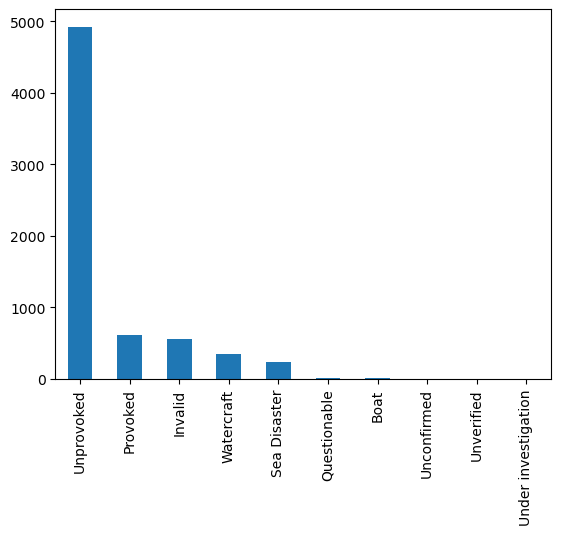

In [9]:
#Visualize the `Type` variable
shark_df['Type'].value_counts().plot(kind='bar')
plt.show()

In [10]:
#Handle missing data -- deletion
shark_df = shark_df[shark_df.isnull().sum(axis=1) < 4] #delete rows with more than 4 missing variables (in each row)


In [11]:
shark_df.shape

(5715, 16)

We deleted rows with a high frequency of missing values but you'll notice that we now have ~1000 less rows. This is the cost that associated with data prep and this is the reason that deletion is not often the first course of action.

**Let's now convert the fields to a suitable data type**

In [12]:
shark_df['Country']  = shark_df['Country'].astype('string')
shark_df['Area']     = shark_df['Area'].astype('string')
shark_df['Location'] = shark_df['Location'].astype('string')

In [13]:
#make year an integer
shark_df['Year']  = shark_df['Year'].astype(int)

#exclude years that are zero
shark_df = shark_df[shark_df['Year'] > 0]


### Data Cleaning for textual data
The following variables should be categorical: `Sex`, `Injury`, `Fatal (Y/N)`. However, let's cleanup the data and then convert themt to a suitable type

In [14]:
print(shark_df.columns)

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source'],
      dtype='object')


In [15]:
#lets look at the frequency of the categorical data from above
shark_df['Sex'].value_counts()


M      4749
F       658
M         2
lli       1
N         1
.         1
Name: Sex, dtype: int64

Data cleaning is required for the variable called `Sex`. Since 'M' (males) are the most common gender in this dataset, let's cleanup the invalid data `lli`, `N` and `.` and replace them with `M`.

In [16]:
shark_df.loc[shark_df['Sex'].isin(['lli', 'N', '.', 'M ']), 'Sex'] = 'M' #impute invalid gender data with the most frequently occurring gender 'M'

In [17]:
shark_df['Sex'].value_counts() #this data is now clean (but still contains some missing values)

M    4754
F     658
Name: Sex, dtype: int64

Lets prepare the `Fatal (Y/N)` variable.

In [18]:
shark_df['Fatal (Y/N)'].value_counts()

N          4173
Y          1057
UNKNOWN      22
 N            7
Nq            1
F             1
M             1
2017          1
Name: Fatal (Y/N), dtype: int64

The variable above contains more than 'Y' or 'N' as options. It contains invalid data: (2017, F, Nq, M), what appears to be a typo ' N' and a new category called 'UNKNOWN'. Let's cleanup the typo ' N' by removing the leading whitespace. After which, any variable that isnt 'Y' or 'N' will be imputed with 'UNKNOWN'. This option is preferred, instead of the most frequent category, because we do not know if the shark attack resulted in a fatality or not (Whereas the other data (Y/N) was confirmed by another source).

In [19]:
shark_df.loc[shark_df['Fatal (Y/N)'] == ' N', 'Fatal (Y/N)'] = 'N'

#impute missing & invalid data with unknown
shark_df.loc[~shark_df['Fatal (Y/N)'].isin(['Y', 'N']), 'Fatal (Y/N)'] = 'UNKNOWN'

In [20]:
#convert variables to categorical dtype
shark_df['Sex']          = shark_df['Sex'].astype('category') #this is categorical
shark_df['Fatal (Y/N)']  = shark_df['Fatal (Y/N)'].astype('category') #this is categorical
shark_df['Type']         = shark_df['Type'].astype('category') 


#convert variables to categorical dtype
shark_df['Injury']       = shark_df['Injury'].astype('string') #this contains a description of the injury
shark_df['Species']      = shark_df['Species'].astype('string') 
shark_df['Name']         = shark_df['Name'].astype('string') 
shark_df['Activity']     = shark_df['Activity'].astype('string') 
shark_df['Case Number']  = shark_df['Case Number'].astype('string') 

#convert variable to date
shark_df['Date'] = pd.to_datetime(shark_df['Date'], errors = 'coerce')

In [21]:
#remove unnecessary column
del shark_df['Investigator or Source']

In [22]:
shark_df.dtypes #verify if the change occured

Case Number            string
Date           datetime64[ns]
Year                    int64
Type                 category
Country                string
Area                   string
Location               string
Activity               string
Name                   string
Sex                  category
Age                    object
Injury                 string
Fatal (Y/N)          category
Time                   object
Species                string
dtype: object

In [23]:
shark_df.drop_duplicates(inplace=True) #remove any duplicate rows

In [24]:
shark_df.shape

(5632, 15)

### 3. Summarize and Visualize the Data. 

Lets determine which country has the most shark attacks

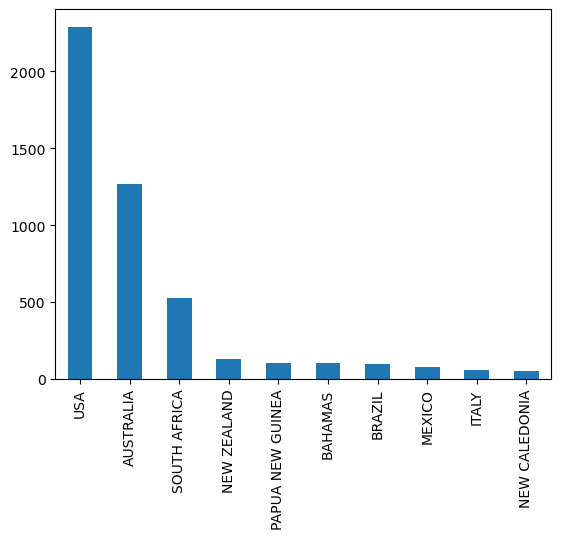

In [25]:
top_ten = shark_df['Country'].value_counts().head(10)

top_ten.plot(kind='bar')
plt.show()

This is surprising! The US has the highest number of shark attacks. I'm now curious how many attacks occur each year? 

## 2. Data Transformation
Data Transformation involves various techniques that can be used to manipulate and restructure data in order to get more insights. There are many types of transformations; in this notebook we will discuss: sorting, subsetting, grouping and aggregating. These techniques will be used to learn more about the occurrence of shark attacks in the USA. Other transformation techniques will be introduced in a later module.



### Sorting & Subsetting
Sorting is a very simple technique that allows you to organize your data in ascending or descending order. This changes the order of the rows so that the data that you need will either be at the top or bottom of the dataframe. Sorting can be performed using the `sort_values()` method and provide the name of the variable that should be used to sort the data. For example, lets sort the `shark_df` using the `Date` variable.

In [34]:
#sorting the incidents by date
shark_df.sort_values('Date', ascending=False).head() 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
3697,1972.12.31,2072-12-31,1972,Unprovoked,SOUTH AFRICA,Western Cape Province,Millers Point,Treading water,Charles Lubbe,M,29,Lower left leg & foot bitten,N,14h00,<NA>
3698,1972.12.26,2072-12-26,1972,Unprovoked,MOZAMBIQUE,Gaza,Xai Xai,Swimming,Helmut Pfosse,M,25,"Hip, leg, arm, hand & shoulder bitten",N,15h00,2 m to 3 m shark
3699,1972.12.25,2072-12-25,1972,Unprovoked,MEXICO,Guerrero,"Revolcadero Beach, Acapulco",Body surfing,Gerald Soukoff,M,17,"FATAL, hand severed, right leg and torso bitten",Y,Afternoon,<NA>
3700,1972.12.24,2072-12-24,1972,Unprovoked,SOUTH AFRICA,Western Cape Province,Hartenbos,Swimming,Johan Brink,M,NaN,"No injury, swim fin bitten",N,09h00,"White shark, > 3 m [10']"
3704,1972.10.22,2072-10-21,1972,Unprovoked,AUSTRALIA,Queensland,"Stevens Reef, 70 miles from Mackay",Spearfishing,Norman Hargreaves,M,24,Right arm bitten,N,NaN,<NA>


In [35]:
#sort using multiple variables
shark_df.sort_values(['Country', 'Activity'], ascending=[True, False]).head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
2412,2000.07.12,2000-07-12,2000,Unprovoked,TONGA,Minerva Reef,Treated at Nuku-alofa,Scuba diving,Christian Eckoff,M,69,Left arm bitten,N,NaN,"Grey reef shark, 2 m [6.75']"
2055,2004.04.13.b,2004-04-13,2004,Unprovoked,TONGA,Nuku'alofa,30 nautical miles offshore,Five men on makeshift raft after their 10 m fi...,male 2,M,NaN,"Bitten on feet, legs, back & abdomen but survi...",Y,NaN,small sharks
2056,2004.04.13.a,2004-04-13,2004,Invalid,TONGA,Nuku'alofa,30 nautical miles offshore,Five men on makeshift raft after their 10 m fi...,male 1,M,NaN,He was was bitten on the arm by small sharks &...,Y,NaN,Questionable Incident
4174,1962.10.15,2062-10-15,1962,Unprovoked,ADMIRALTY ISLANDS,Manus Island,Sisi (west coast of island),<NA>,Pasingan,M,26,Facial lacerations,N,NaN,<NA>
4674,1955.08.08,2055-08-08,1955,Unprovoked,AMERICAN SAMOA,Tutuila Island,Pago Pago Bay,Swimming,Sailor from tuna vessel,M,28,"FATAL, abdomen bitten",Y,A.M.,Blue shark


**Subsetting**: allows us to focus our analysis using only the data that we need. Therefore, we can select a subset of the columns and/or rows and the result is usually assigned to a new variable.

The example below will subset the data to only identify all attacks within the USA.

In [36]:
#subsetting: only extract events that occurred in the USA
us_shark_df = shark_df[shark_df['Country'] == 'USA']

us_shark_df.head() #quickly view the data



,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
1,2021.09.09,2021-09-09,2021,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Doyle Neilsen,M,!6,Minor injury to right arm,N,13h20,<NA>
4,2021.08.28,2021-08-28,2021,Unprovoked,USA,Texas,"Galveston Island, Galveston County",Boogie boarding,male,M,!!,Lacerations both sides of lower leg immediatel...,N,11h45,<NA>
5,2021.09.03,2021-09-03,2021,Unprovoked,USA,Louisiana,off Grand Isle,"Fishing, fell in water",male,M,64,Severe injury to leg,N,14h00,<NA>
6,2021.08.21,2021-08-21,2021,Unprovoked,USA,Florida,"Walton Beach Psrk, St. Lucie County",Surfing,Jeremy Carr,M,41,Left ankle and foot bitten,N,06h40,Bull shark
9,2021.08.07.b,2021-08-07,2021,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,35,Minor cuts to right foot and ankle,N,10h00,<NA>


Now that we know which attacks occurred within the USA, we can perform other data transformation techniques to learn more about them.

### Grouping & Aggregating
This allows you to perform custom analysis and/or create summary statistics to compare different groups of data.

<img src='https://www.w3resource.com/w3r_images/pandas-groupby-split-apply-combine.svg'></img>

<p style="font-size:8px; text-align:center">Credit: https://www.w3resource.com/python-exercises/pandas/groupby/index.php</p>

In [29]:
#count the number of shark attack that occur in the USA each year
annual_attacks = us_shark_df.groupby(['Year'], as_index=False)['Case Number'].count()
annual_attacks = annual_attacks[annual_attacks['Year'] > 1900]
annual_attacks

,Year,Case Number
55,1901,1
56,1902,3
57,1903,2
58,1904,2
59,1905,5
...,...,...
167,2017,64
168,2018,42
169,2019,56
170,2020,48


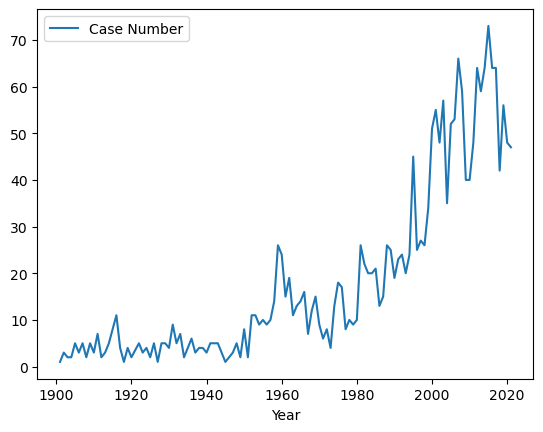

In [37]:
annual_attacks.plot(x='Year', y='Case Number')
plt.show()

In [31]:
#analyze the annual number of attacks for each Area in the USA. 
annual_attacks_by_area = us_shark_df.groupby(['Year', 'Area'], as_index=False)['Case Number'].count()
annual_attacks_by_area = annual_attacks_by_area[annual_attacks_by_area['Year'] > 1900]


#which Area has the highest number of shark attacks
annual_attacks_by_area.sort_values('Case Number', ascending=False)#sort the results

,Year,Area,Case Number
508,2003,Florida,45
542,2007,Florida,39
491,2001,Florida,38
549,2008,Florida,36
485,2000,Florida,35
...,...,...,...
310,1966,Delaware,1
308,1965,Texas,1
307,1965,Puerto Rico,1
306,1965,New Jersey,1


In [38]:
#other summary stats
annual_attacks_by_area_2 = us_shark_df.groupby(['Year', 'Area'], as_index=False).agg({'Date': [min, max], 'Case Number': 'count'})
annual_attacks_by_area_2

Year            Area       Date            Case Number
                                 min        max       count
0    1000     Puerto Rico        NaT        NaT           1
1    1642       New York         NaT        NaT           1
2    1779          Hawaii 1779-01-01 1779-01-01           1
3    1780         Florida 1780-08-08 1780-08-08           1
4    1810  South Carolina 1810-09-15 1810-09-15           1
..    ...             ...        ...        ...         ...
679  2021            Maui 2021-02-02 2021-02-02           1
680  2021        New York 2021-07-26 2021-07-26           1
681  2021  North Carolina 2021-04-17 2021-07-27           3
682  2021  South Carolina 2021-05-23 2021-08-03           2
683  2021           Texas 2021-08-28 2021-08-28           1

[684 rows x 5 columns]

In [39]:
annual_attacks_by_area_2[annual_attacks_by_area_2['Year'] == 2021]

Year            Area       Date            Case Number
                                 min        max       count
672  2021         BAHAMAS 2021-07-04 2021-07-04           1
673  2021      California 2021-06-26 2021-07-21           3
674  2021         Florida 2021-01-02 2021-09-09          26
675  2021         Georgia 2021-07-27 2021-07-27           1
676  2021          Hawaii 2021-01-02 2021-05-15           6
677  2021       Louisiana 2021-09-03 2021-09-03           1
678  2021        Maryland 2021-08-02 2021-08-02           1
679  2021            Maui 2021-02-02 2021-02-02           1
680  2021        New York 2021-07-26 2021-07-26           1
681  2021  North Carolina 2021-04-17 2021-07-27           3
682  2021  South Carolina 2021-05-23 2021-08-03           2
683  2021           Texas 2021-08-28 2021-08-28           1